In [1]:
import numpy as np

import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS

import jax
import jax.numpy as jnp

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
intercept_0 = 4
beta_0 = [2, 3] # the _0 represents the true parameter, not to be confused with the intercept
sigma_0 = 1.5
n = 20

rng_key = jax.random.PRNGKey(123)

In [3]:
np.random.seed(123)

x1 = np.random.normal(loc=3, scale=2, size=[n, 1])**2
x2 = np.random.binomial(n=1, p=0.4, size=[n, 1])
assert sum(x2) > 0 and sum(x2) < n

x = np.hstack((x1, x2))
y = intercept_0 + x@np.array(beta_0) + np.random.normal(loc=0, scale=sigma_0, size=[n,])

In [4]:
def model(x, y):
    intercept = numpyro.sample("intercept", dist.Normal(loc=0, scale=10))
    beta = []
    
    for i in range(x.shape[1]):
        beta.append(numpyro.sample(f"beta{i+1}", dist.Normal(loc=0, scale=10)))
        
    sigma = numpyro.sample("sigma", dist.InverseGamma(concentration=4, rate=2))
    
    mean = intercept + jnp.matmul(x, jnp.array(beta))
    
    y = numpyro.sample("y", dist.Normal(loc=mean, scale=sigma), obs=y)

In [5]:
nuts_kernel = NUTS(model=model)
mcmc = MCMC(
    sampler=nuts_kernel,
    num_warmup=5000,
    num_samples=10000,
    num_chains=1,
)
posterior = mcmc.run(rng_key=rng_key, x=x, y=y)
samples = mcmc.get_samples()

sample: 100%|██████████| 15000/15000 [00:14<00:00, 1047.85it/s, 7 steps of size 4.49e-01. acc. prob=0.92] 


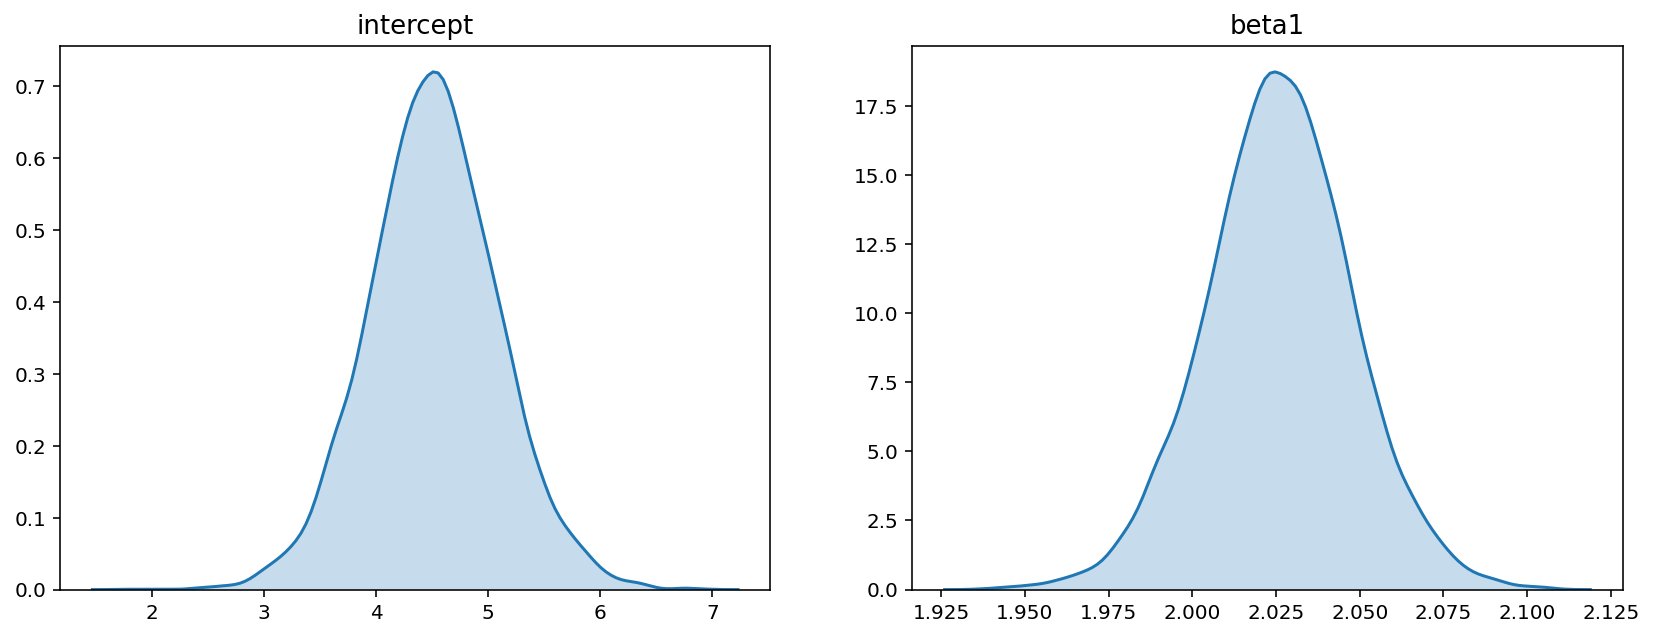

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
sns.kdeplot(np.array(samples["intercept"]), shade=True, ax=axes[0])
_ = axes[0].set_title("intercept", fontsize=13)
sns.kdeplot(np.array(samples["beta1"]), shade=True, ax=axes[1])
_ = axes[1].set_title("beta1", fontsize=13)

NameError: name 'p' is not defined

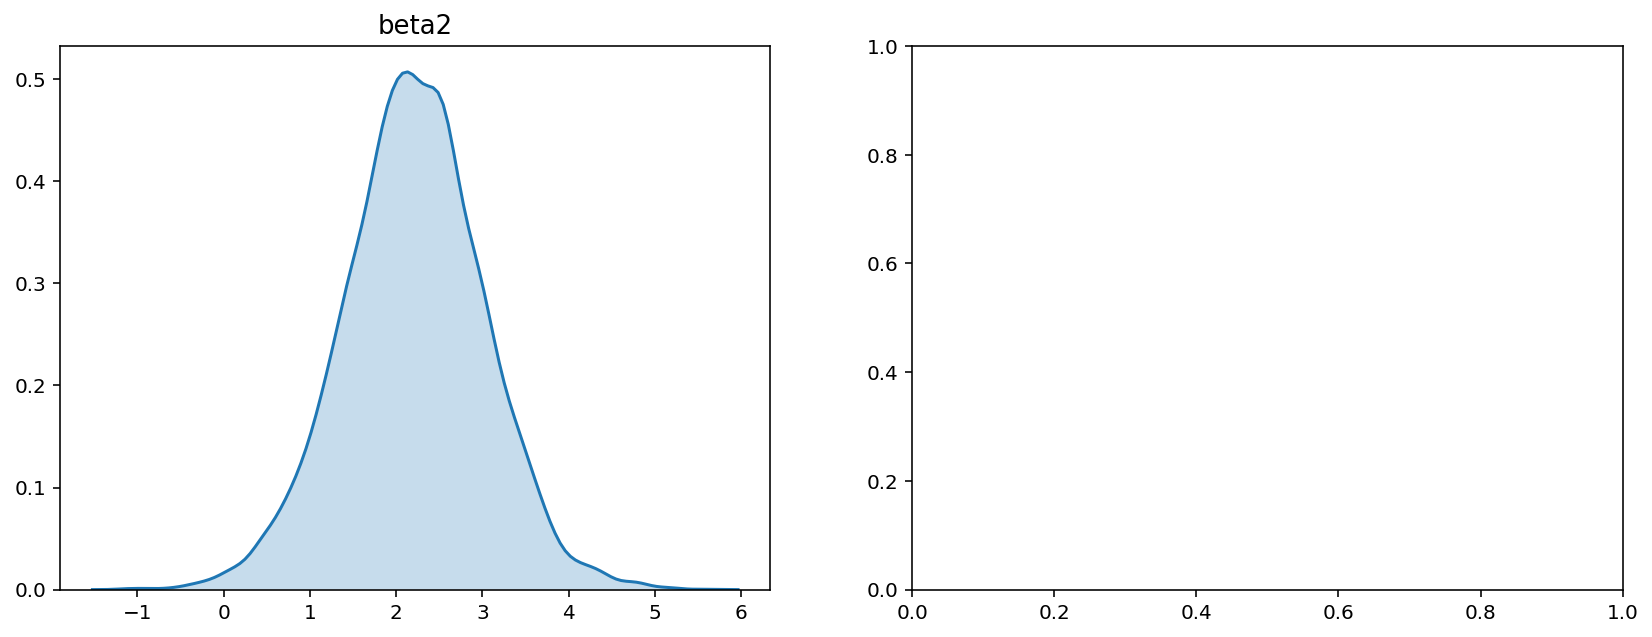

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
sns.kdeplot(np.array(samples["beta2"]), shade=True, ax=axes[0])
_ = axes[0].set_title("beta2", fontsize=13)
sns.kdeplot(p.array(samples["sigma"]), shade=True, ax=axes[1])
_ = axes[1].set_title("sigma", fontsize=13)